# Assignment 1: Linear Regression with gradient descent


###  Import necessary packages and functions


In [1]:
import matplotlib.pyplot as plt

import numpy as np
from load_auto import load_auto, load_auto_hp
from assignment_1_functions import train_linear_model

### Import and normalize the data


In [2]:
# Load data for horsepower only
X_train_hp, y_train_hp = load_auto_hp()
# Load all data
X_train_all, y_train_all = load_auto()
# Normalize data
X_train_all_norm = (X_train_all - np.mean(X_train_all)) / np.std(X_train_all)
X_train_hp_norm = (X_train_hp - np.mean(X_train_hp)) / np.std(X_train_hp)
# Comment out above and comment in below to use non-normalized data
#X_train_all_norm = X_train_all
#X_train_hp_norm = X_train_hp




### Train two models, one with only hp and one with all features

In [3]:
n_iterations = 10**6
learning_rate = 10**(-1)
print("Starting training...")
#Training hp model
w_hp, b_hp, costs_hp = train_linear_model(X_train_hp_norm, y_train_hp, learning_rate,  n_iterations)

#Training model wiht all features
w_all, b_all, costs_all = train_linear_model(X_train_all_norm, y_train_all, learning_rate, n_iterations,)
print("Training Complete")
print()
print(f"Loss hp model: {costs_hp[-1]}")
print(f"Loss all model: {costs_all[-1]}")
print("-------------------")
print(f"HP model weights: {w_hp}")
print(f"HP model bias: {b_hp}")
print("-------------------")
print(f"All model weights: {w_all}")
print(f"All model bias: {b_all}")

print()
print("Formula for hp model:")
print(f"z = {w_hp} * x + {b_hp}")
print()
print("Formula for model with all features:")
print(f"z = {w_all} * X + {b_all}")


Starting training...
Training Complete

Loss hp model: 23.943662938603108
Loss all model: 11.86878601381045
-------------------
HP model weights: [[-6.0678724]]
HP model bias: [23.44591837]
-------------------
All model weights: [[-108.28584896]
 [   1.52308185]
 [ -20.11636492]
 [  -6.57681861]
 [ -55.99782867]
 [ 652.71574919]
 [   4.07671588]]
All model bias: [208.90211628]

Formula for hp model:
z = [[-6.0678724]] * x + [23.44591837]

Formula for model with all features:
z = [[-108.28584896]
 [   1.52308185]
 [ -20.11636492]
 [  -6.57681861]
 [ -55.99782867]
 [ 652.71574919]
 [   4.07671588]] * X + [208.90211628]


<function matplotlib.pyplot.show(close=None, block=None)>

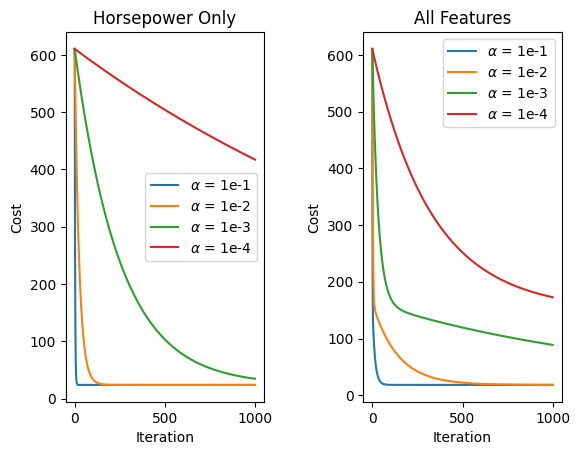

In [4]:
gammas = [ -1, -2, -3, -4]
labels = [f"$\\alpha$ = 1e{g}" for g in gammas]
training_sets = [X_train_hp_norm, X_train_all_norm] # [X_train_hp, X_train_all] Uncomment to use non-normalized data
titles = ["Horsepower Only", "All Features"]
n_iterations = 10**3
costs_hp = []
costs_all = []
# Train models with different learning rates and saves costs in lists
for trainset, title in zip(training_sets, titles):
    for g in gammas:
        w, b, costs = train_linear_model(trainset, y_train_hp, 10**g, n_iterations)
        if title == "Horsepower Only":
            costs_hp.append(costs)
        else:
            costs_all.append(costs)

# Plots of cost vs iteration for different learning rates in two subplots
plt.figure()
plt.subplot(1, 2, 1)
for i in range(len(gammas)):
    plt.plot(costs_hp[i])
    
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title("Horsepower Only")
plt.legend(labels)


plt.subplot(1, 2, 2)
for i in range(len(gammas)):
    plt.plot(costs_all[i])
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title("All Features")
plt.legend(labels)
plt.subplots_adjust(wspace=0.5)
plt.show





In [5]:
# Solving with Normal Equation
X_eq = X_train_hp_norm
X_eq= np.concatenate((np.ones((X_eq.shape[0], 1)), X_eq), axis=1)
y = y_train_hp
# Calculate the optimal parameters using the normal equation
parameters = np.linalg.inv(X_eq.T @ X_eq) @ X_eq.T @ y

# Separate the bias term and the coefficients
bias = parameters[0]
coefficients = parameters[1:]

print("Bias:", bias)
print("Coefficients:", coefficients)

Bias: [23.44591837]
Coefficients: [[-6.0678724]]


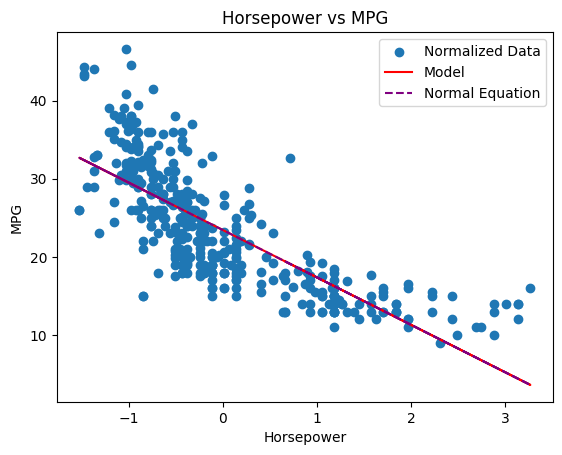

In [6]:
# Plot horserpower vs mpg
plt.figure()
plt.scatter(X_train_hp_norm, y_train_hp, label='Normalized Data')
plt.plot(X_train_hp_norm, X_train_hp_norm * w_hp + b_hp, label='Model', color='red')
plt.plot(X_train_hp_norm, X_train_hp_norm * coefficients + bias, label='Normal Equation', color='purple', linestyle='--')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Horsepower vs MPG')
plt.legend()
plt.show()